<a href="https://colab.research.google.com/github/Geckomonc/FundamentosDatos/blob/main/sesiones_practicas/FCD_U2_a_ciclo_de_vida_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:#2F749F;"><strong>CRISP-DM – Fase 1: Entendimiento del negocio </strong></span>

<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
<b>AIRBNB</b><br>  


<p align="center">
    <img src="Local\imgs\U2\air-bnb.jpg" alt="air-bnb" width="800"  height="400">
</p>

Imagen tomada de [bmtoolbox.net](https://bmtoolbox.net/stories/airbnb/).


**Objetivo:**
<br> Predecir precios de alojamiento en Airbnb y analizar factores que influyen en los precios.

**Preguntas clave:**
- ¿Qué tan distinto es el precio entre propiedades con políticas de cancelación flexibles vs estrictas?
- ¿Tienen los Superhosts precios diferentes al resto?

In [1]:
# import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importar datos desde Kaggle y guardar en data
import kagglehub
airbnb_seattle_path = kagglehub.dataset_download('airbnb/seattle')

print('Data source import complete.')

# Ruta del directorio que descargaste con kagglehub
origen = airbnb_seattle_path

# Crear carpeta destino si no existe
carpeta_destino = 'data'
os.makedirs(carpeta_destino, exist_ok=True)

# Lista de los nombres exactos de los CSV que quieres mover
archivos_a_mover = ['listings.csv', 'calendar.csv', 'reviews.csv']

# Mover cada archivo
for archivo in archivos_a_mover:
    origen_archivo = os.path.join(origen, archivo)
    destino_archivo = os.path.join(carpeta_destino, archivo)
    shutil.copy(origen_archivo, destino_archivo)
    print(f"{archivo} copiado a {carpeta_destino}/")

print("\Todos los archivos han sido copiados con éxito.")

# Cargar archivos
listings = pd.read_csv('data/listings.csv')
calendar = pd.read_csv('data/calendar.csv')
reviews = pd.read_csv('data/reviews.csv')

<>:37: SyntaxWarning: invalid escape sequence '\T'
<>:37: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3388937220.py:37: SyntaxWarning: invalid escape sequence '\T'
  print("\Todos los archivos han sido copiados con éxito.")


100%|██████████| 19.5M/19.5M [00:01<00:00, 18.8MB/s]

Extracting files...


Data source import complete.
listings.csv copiado a data/
calendar.csv copiado a data/
reviews.csv copiado a data/
\Todos los archivos han sido copiados con éxito.


## <span style="color:#2F749F;"><strong>CRISP-DM – Fase 2: Entendimiento de los datos </strong></span>

Una vez que el problema está claramente delimitado, el siguiente paso es **recolectar y explorar los datos relevantes**.  El objetivo es evaluar su potencial para transformarse en <span style="font-size:18px; color:#4CAF50;">**conocimiento accionable**</span>.  

<p align="center">
    <img src="Local\imgs\U2\F2.jpg" alt="F2" width="1000"  height="500">
</p>

Imagen tomada de [medium.com](https://medium.com/analytics-vidhya/crisp-dm-phase-2-data-understanding-b4d627ba6b45)

### **Aspectos principales de la exploración:**
- Revisión de **metadatos** para conocer la estructura de los datos.  
- Análisis de **calidad, integridad y representatividad** de la información.  
- Aplicación de técnicas como el **análisis exploratorio de datos (AED)**, resúmenes estadísticos y visualizaciones, que permiten detectar patrones, anomalías y limitaciones [(Han et al., 2011)](http://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf).  

### **Validación de supuestos**
Durante esta fase es común encontrar que **algunas hipótesis iniciales no se cumplen**:  
- Atributos relevantes ausentes.  
- Presencia de registros duplicados.  
- Valores inconsistentes o faltantes.  

### **Para afrontar estos retos se utilizan:**
- Matrices de correlación.  
- Herramientas de perfilado de datos.  
- Análisis de valores perdidos.  

### **Conexión con la comprensión del negocio**
Los hallazgos obtenidos retroalimentan la **fase de comprensión de la empresa**, lo que permite **ajustar el planteamiento del problema o redefinir el alcance del proyecto**.  


<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
<b>AIRBNB</b><br>  

Desde 2008, huéspedes y anfitriones han usado Airbnb para viajar de una forma más única y personalizada. Como parte de la iniciativa Airbnb Inside, este conjunto de datos describe la actividad de anuncios de alojamientos familiares en Seattle, Washington.

Fuente de datos: [Kaggle.com](https://www.kaggle.com/datasets/airbnb/seattle).

Este conjunto de datos de Seattle incluye la siguiente actividad de Airbnb:
- Anuncios (listings), con descripciones completas y puntuación media de las reseñas.
- Reseñas (reviews), ID único de cada reseñador y comentarios detallados.
- Calendario (calendar), ID del anuncio, el precio y la disponibilidad para ese día.

In [2]:
# Vista previa
print("📅 Vista previa de calendar:\n", calendar.head(2), "\n")
print("💬 Vista previa de reviews:\n", reviews.head(2), "\n")
print("🧾 Vista previa de listings:\n", listings.head(2), "\n")

📅 Vista previa de calendar:
    listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00 

💬 Vista previa de reviews:
    listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...   

🧾 Vista previa de listings:
        id                          listing_url       scrape_id last_scraped  \
0  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1  953595  https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   

                                 name  \
0        Stylish Queen Anne Apartment   
1  Bright & Airy Queen Anne Apartment   

                                             summary

In [3]:
# Dimensiones y columnas
print(f"🧾 Listings: {listings.shape}")
print(listings.columns.tolist(), "\n")

print(f"📅 Calendar: {calendar.shape}")
print(calendar.columns.tolist(), "\n")

print(f"💬 Reviews: {reviews.shape}")
print(reviews.columns.tolist(), "\n")

🧾 Listings: (3818, 92)
['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit'

In [4]:
# Tipos de datos y nulos
print("\n🧾 Info Listings:")
listings.info()
print("\n📅 Info Calendar:")
calendar.info()
print("\n💬 Info Reviews:")
reviews.info()


🧾 Info Listings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   o

In [5]:
# Valores nulos (porcentaje)
print("\n❗Porcentaje de valores nulos en Listings:")
print((listings.isnull().mean() * 100).sort_values(ascending=False).round(2))

print("\n❗Porcentaje de valores nulos en Calendar:")
print((calendar.isnull().mean() * 100).sort_values(ascending=False).round(2))

print("\n❗Porcentaje de valores nulos en Calendar:")
print((reviews.isnull().mean() * 100).sort_values(ascending=False).round(2))


❗Porcentaje de valores nulos en Listings:
license                             100.00
square_feet                          97.46
monthly_price                        60.27
security_deposit                     51.13
weekly_price                         47.38
                                     ...  
jurisdiction_names                    0.00
cancellation_policy                   0.00
require_guest_profile_picture         0.00
require_guest_phone_verification      0.00
calculated_host_listings_count        0.00
Length: 92, dtype: float64

❗Porcentaje de valores nulos en Calendar:
price         32.94
listing_id     0.00
date           0.00
available      0.00
dtype: float64

❗Porcentaje de valores nulos en Calendar:
comments         0.02
listing_id       0.00
id               0.00
date             0.00
reviewer_id      0.00
reviewer_name    0.00
dtype: float64


#Limpieza básica de los precios

In [6]:
# Convertir precios
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Filtrar outliers extremos (ej. precios > 1000 o = 0)
listings = listings[(listings['price'] > 0) & (listings['price'] < 1000)]

# Exploración rápida: Miramos cuántos registros hay por política.

In [7]:
listings['cancellation_policy'].value_counts()

,count
cancellation_policy,
strict,1417
moderate,1251
flexible,1149


# Realizamos un gráfico de boxplot para verificar si los precios entre los estrictos y los flexibles varían y cuanto es esa variación.

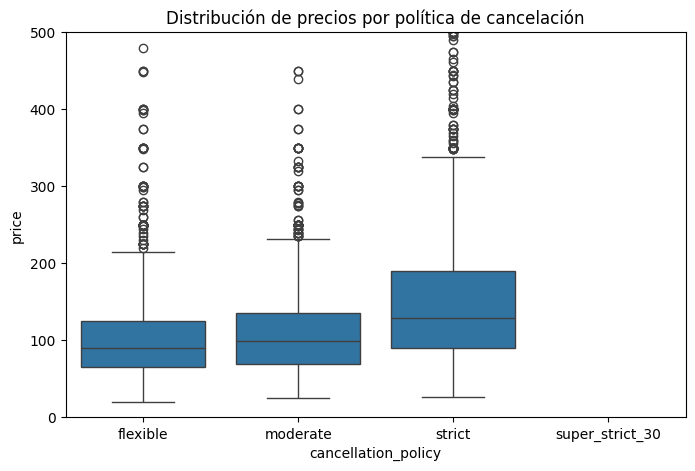

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cancellation_policy', y='price', data=listings, order=['flexible','moderate','strict','super_strict_30'])
plt.ylim(0,500)  # límite opcional para ver mejor la dispersión
plt.title("Distribución de precios por política de cancelación")
plt.show()


# Tabla comparativa: precio medio, mediano y número de propiedades por política.

In [9]:
listings.groupby('cancellation_policy')['price'].agg(['mean','median','count']).sort_values('mean')

,mean,median,count
cancellation_policy,,,
flexible,108.759791,90.0,1149
moderate,114.775380,99.0,1251
strict,154.597036,129.0,1417


# Histograma/KDE comparativo: para ver si las distribuciones se solapana

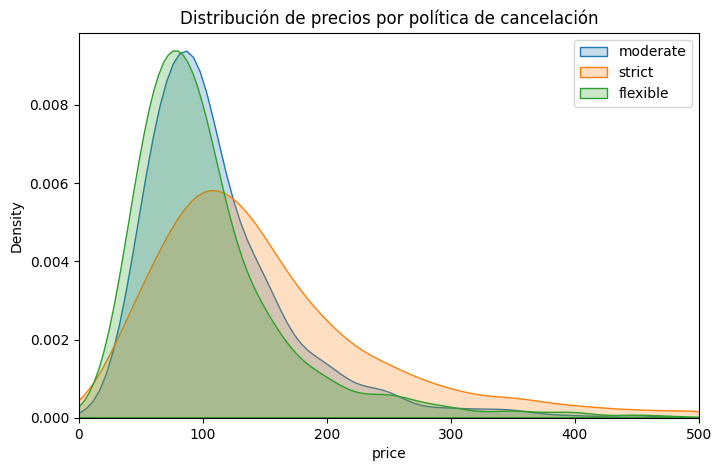

In [10]:
plt.figure(figsize=(8,5))
for policy in listings['cancellation_policy'].unique():
    subset = listings[listings['cancellation_policy']==policy]['price']
    sns.kdeplot(subset, label=policy, shade=True)
plt.xlim(0,500)
plt.title("Distribución de precios por política de cancelación")
plt.legend()
plt.show()

# Usamos violin para comparar cada par de políticas

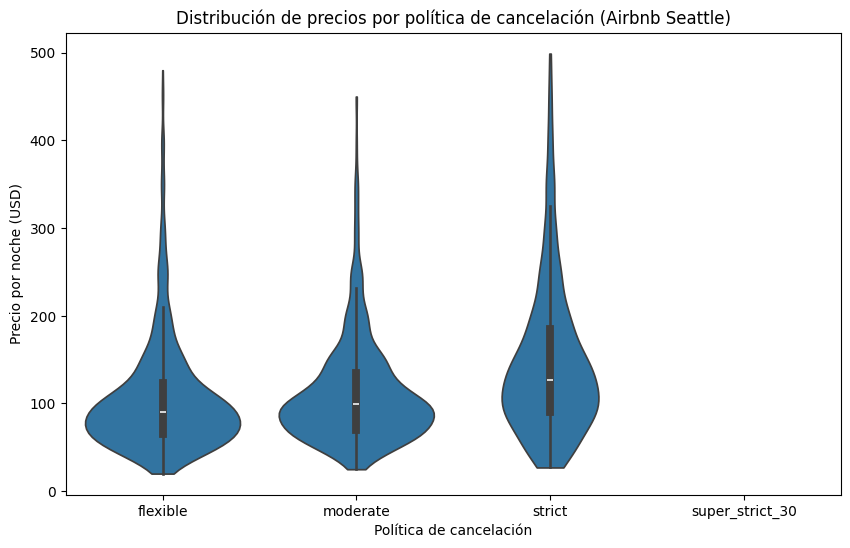

In [16]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Filtrar precios atípicos extremos para que la visualización sea más clara
listings_filtered = listings[(listings['price'] > 0) & (listings['price'] < 500)]

# Violin plot
plt.figure(figsize=(10,6))
sns.violinplot(
    x='cancellation_policy',
    y='price',
    data=listings_filtered,
    order=['flexible','moderate','strict','super_strict_30'],
    inner="box",
    cut=0
)
plt.title("Distribución de precios por política de cancelación (Airbnb Seattle)")
plt.ylabel("Precio por noche (USD)")
plt.xlabel("Política de cancelación")
plt.show()

# Mostramos la distribución de precios dependiendo si es Superhost vs No Superhost

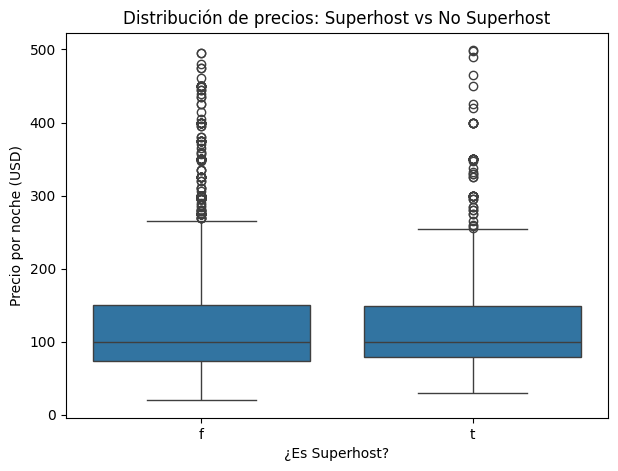

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x='host_is_superhost', y='price', data=listings_filtered)
plt.title("Distribución de precios: Superhost vs No Superhost")
plt.xlabel("¿Es Superhost?")
plt.ylabel("Precio por noche (USD)")
plt.show()

In [ ]:
# --- Cálculo de estadísticas clave ---
n_listings = len(listings)
n_calendar = len(calendar)
n_reviews = len(reviews)

# Columnas con más valores nulos
nulos = listings.isnull().mean().sort_values(ascending=False)
col1, p1 = nulos.index[0], round(nulos.iloc[0]*100, 1)
col2, p2 = nulos.index[1], round(nulos.iloc[1]*100, 1)

# Tipos de habitación
tipos = listings['room_type'].value_counts(normalize=True).mul(100).round(1)
tipo1, pt1 = tipos.index[0], tipos.iloc[0]
tipo2, pt2 = tipos.index[1], tipos.iloc[1]

# Precios
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
mediana = round(calendar['price'].median(), 2)
maximo = round(calendar['price'].max(), 2)

# Año con más reseñas
reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')
año_pico = reviews['date'].dt.year.value_counts().idxmax()

# --- Crear tabla resumen ---
tabla = pd.DataFrame({
    "Categoría": [
        "📦 N.º de registros",
        "❗ Columnas con más nulos",
        "🏠 Tipo de alojamiento más común",
        "💵 Distribución de precios",
        "📅 Año con más reseñas",
        "💡 Observaciones destacadas"
    ],
    "Resultado": [
        f"Listings: {n_listings}, Calendar: {n_calendar}, Reviews: {n_reviews}",
        f"{col1} ({p1}%), {col2} ({p2}%) en listings.csv",
        f"{tipo1} ({pt1}%), seguido de {tipo2} ({pt2}%)",
        f"Mediana: ${mediana}, Máximo: ${maximo}",
        f"{año_pico}",
        "Precios más altos los fines de semana. Más reseñas en alojamientos económicos."
    ]
})

# Tabla
tabla.style.set_properties(**{'text-align': 'left'})

,Categoría,Resultado
0,📦 N.º de registros,"Listings: 3818, Calendar: 1393570, Reviews: 84849"
1,❗ Columnas con más nulos,"license (100.0%), square_feet (97.5%) en listings.csv"
2,🏠 Tipo de alojamiento más común,"Entire home/apt (66.6%), seguido de Private room (30.4%)"
3,💵 Distribución de precios,"Mediana: $109.0, Máximo: $1650.0"
4,📅 Año con más reseñas,2015
5,💡 Observaciones destacadas,Precios más altos los fines de semana. Más reseñas en alojamientos económicos.


In [ ]:
# Insights rápidos
# Tipos de habitación
tipos = listings['room_type'].value_counts()
porcentajes = listings['room_type'].value_counts(normalize=True).mul(100).round(2)

# Combinar en un DataFrame para presentación clara
resumen_tipos = pd.DataFrame({
    'Cantidad': tipos,
    'Porcentaje (%)': porcentajes
})

print("\n🏠 Tipos de habitación:\n")
print(resumen_tipos)


reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')
reviews['year'] = reviews['date'].dt.year
# Agrupar por año: total de reseñas y propiedades únicas
resumen = reviews.groupby('year').agg({
    'id': 'count',
    'listing_id': pd.Series.nunique
}).rename(columns={
    'id': 'Reseñas',
    'listing_id': 'Propiedades únicas'
})

# Calcular porcentaje con respecto al total de reseñas
total_reseñas = resumen['Reseñas'].sum()
resumen['% sobre total'] = (resumen['Reseñas'] / total_reseñas * 100).round(2)

# Reordenar columnas
resumen = resumen[['Reseñas', '% sobre total', 'Propiedades únicas']]

print("\n🗓️ Reseñas por año:")
print(resumen)



🏠 Tipos de habitación:

                 Cantidad  Porcentaje (%)
room_type                                
Entire home/apt      2541           66.55
Private room         1160           30.38
Shared room           117            3.06

🗓️ Reseñas por año:
      Reseñas  % sobre total  Propiedades únicas
year                                            
2009       17           0.02                   4
2010      254           0.30                  35
2011     1169           1.38                  96
2012     3251           3.83                 232
2013     7077           8.34                 508
2014    20365          24.00                1203
2015    52493          61.87                3091
2016      223           0.26                 217


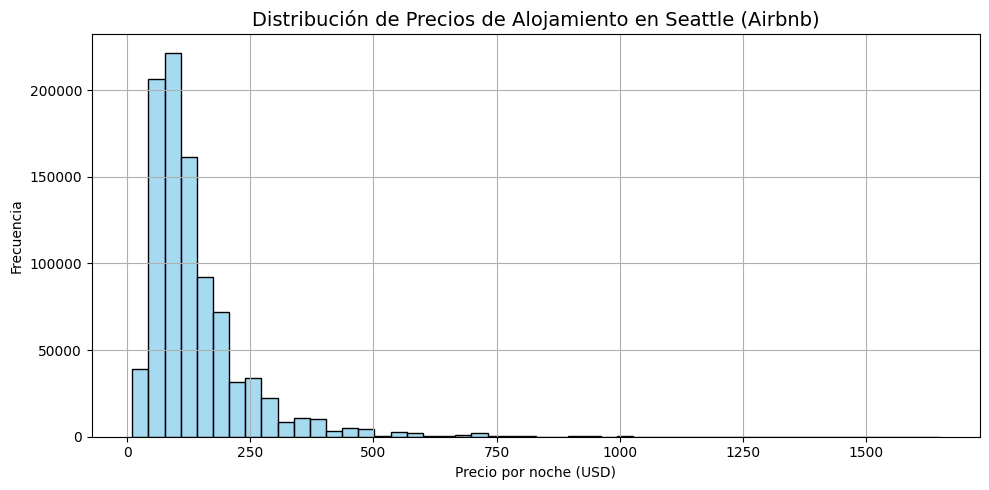

In [ ]:
# Asegurarse de que 'price' esté en formato numérico
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(10, 5))
sns.histplot(calendar['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios de Alojamiento en Seattle (Airbnb)', fontsize=14)
plt.xlabel('Precio por noche (USD)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


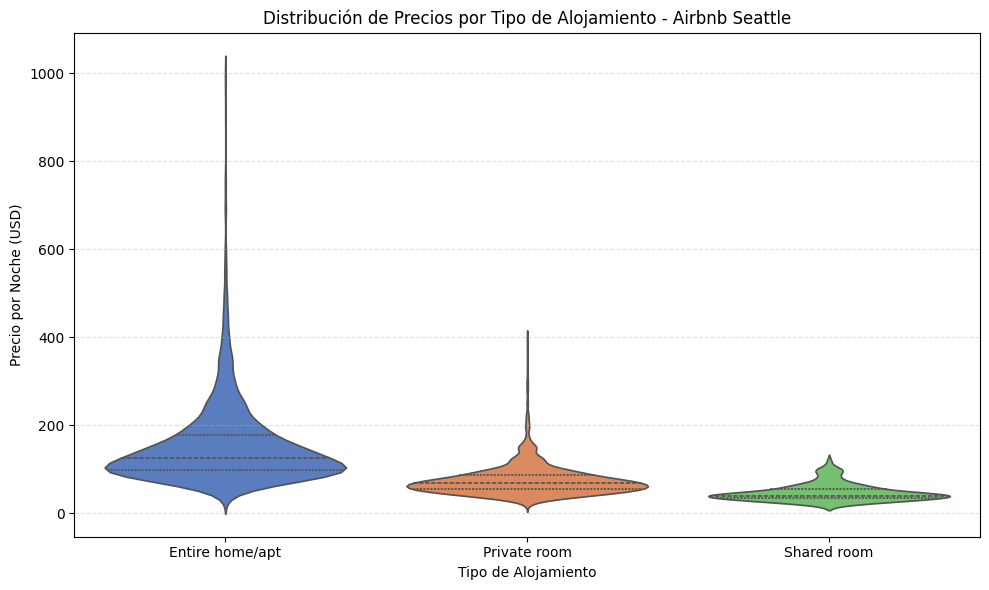

In [ ]:
# Conversión del precio a valor numérico
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Filtrar precios por debajo de $1000
listings_filtrado = listings[listings['price'] < 10000]

plt.figure(figsize=(10, 6))
sns.violinplot(data=listings_filtrado, x='room_type', y='price', palette='muted', inner='quartile')
plt.title('Distribución de Precios por Tipo de Alojamiento - Airbnb Seattle')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Precio por Noche (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## <span style="color:#2F749F;"><strong>CRISP-DM – Fase 3: Preparación de los datos </strong></span>

La preparación de los datos suele ser la etapa más extensa del proceso.  


<p align="center">
    <img src="Local\imgs\U2\F3.jpg" alt="F3" width="1000"  height="500">
</p>

Imagen tomada de [medium.com](https://medium.com/analytics-vidhya/crisp-dm-phase-3-data-preparation-faf5ee8dc38e)

### **Principales actividades**
- **Imputación** de valores faltantes.  
- **Tratamiento** de valores atípicos.  
- **Codificación** de variables categóricas.  
- **Normalización** y escalamiento.  
- **Creación** de variables derivadas (Kelleher & Tierney, 2018).  


### **Impacto en el modelado**
Un proceso de preparación adecuado mejora tanto la **precisión** como la **estabilidad** de los modelos.  
Para reforzar la repetibilidad, se emplean **conductos de datos automatizados** desarrollados en Python, R o mediante herramientas ETL.  


### **Ingeniería de características**
Esta tarea combina lo técnico con lo creativo:  
- Integración de variables.  
- Cálculo de retardos o diferencias.  
- Transformaciones específicas del dominio de aplicación.  

### **Documentación y transparencia**
Registrar cada paso de preparación es esencial para garantizar **reproducibilidad** y **claridad**, especialmente en contextos sujetos a regulación estricta.  

<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
<b>AIRBNB</b><br>  
<br> - Limpia y transforma precios, fechas y textos clave.
<br> - Estandariza formatos para evitar errores en modelado o visualización.
<br> - Crea nuevas variables como día de la semana o reseñas por alojamiento.
<br> - Fusiona datasets para tener una tabla final rica en variables.
<br> - Eliminación de outliers con IQR

In [ ]:
# ------------------------------
# Limpieza y features en calendar.csv
# ------------------------------
calendar['price'] = pd.to_numeric(
    calendar['price'].replace('[\$,]', '', regex=True), errors='coerce'
)
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')
calendar = calendar.dropna(subset=['date', 'price'])

# Eliminar outliers (IQR)
q1_c, q3_c = calendar['price'].quantile([0.25, 0.75])
iqr_c = q3_c - q1_c
lim_inf_c, lim_sup_c = q1_c - 1.5 * iqr_c, q3_c + 1.5 * iqr_c
calendar = calendar[(calendar['price'] >= lim_inf_c) & (calendar['price'] <= lim_sup_c)]

# Filtrar precios menores a 270
calendar = calendar[calendar['price'] < 270]

# Variables temporales
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month
calendar['weekday'] = calendar['date'].dt.day_name()

In [ ]:
# ------------------------------
#  Limpieza y enriquecimiento en reviews.csv
# ------------------------------
reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')
reviews = reviews.dropna(subset=['date', 'listing_id'])

reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month

# Reseñas por alojamiento
reseñas_por_listing = reviews.groupby('listing_id').size().reset_index(name='reseñas_totales')


In [ ]:

# ------------------------------
# Limpieza de listings.csv
# ------------------------------
listings['price'] = pd.to_numeric(
    listings['price'].replace('[\$,]', '', regex=True), errors='coerce'
)

# Convertir tasas de respuesta a float
if 'host_response_rate' in listings.columns:
    listings['host_response_rate'] = (
        listings['host_response_rate'].astype(str)
        .str.replace('%', '', regex=False)
    )
    listings['host_response_rate'] = pd.to_numeric(
        listings['host_response_rate'], errors='coerce'
    ) / 100.0

# Eliminar outliers (IQR)
q1_l, q3_l = listings['price'].quantile([0.25, 0.75])
iqr_l = q3_l - q1_l
lim_inf_l, lim_sup_l = q1_l - 1.5 * iqr_l, q3_l + 1.5 * iqr_l
listings_clean = listings[(listings['price'] >= lim_inf_l) & (listings['price'] <= lim_sup_l)]

# Filtrar precios menores a 270
listings_clean = listings_clean[listings_clean['price'] < 270]

# Selección de columnas relevantes
variables_utiles = [
    'id', 'name', 'neighbourhood_cleansed', 'room_type',
    'accommodates', 'price', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]
listings_clean = listings_clean[variables_utiles].copy()

# Agregar reseñas por alojamiento
listings_clean = listings_clean.merge(
    reseñas_por_listing, left_on='id', right_on='listing_id', how='left'
)
listings_clean['reseñas_totales'] = listings_clean['reseñas_totales'].fillna(0).astype(int)

In [ ]:
# ------------------------------
# Resumen de validación
# ------------------------------
print("calendar limpio:", calendar.shape)
print("reviews limpio:", reviews.shape)
print("listings limpio:", listings_clean.shape)
print("Columnas finales:", listings_clean.columns.tolist())

calendar limpio: (854053, 7)
reviews limpio: (84849, 8)
listings limpio: (3572, 11)
Columnas finales: ['id', 'name', 'neighbourhood_cleansed', 'room_type', 'accommodates', 'price', 'number_of_reviews', 'review_scores_rating', 'availability_365', 'listing_id', 'reseñas_totales']


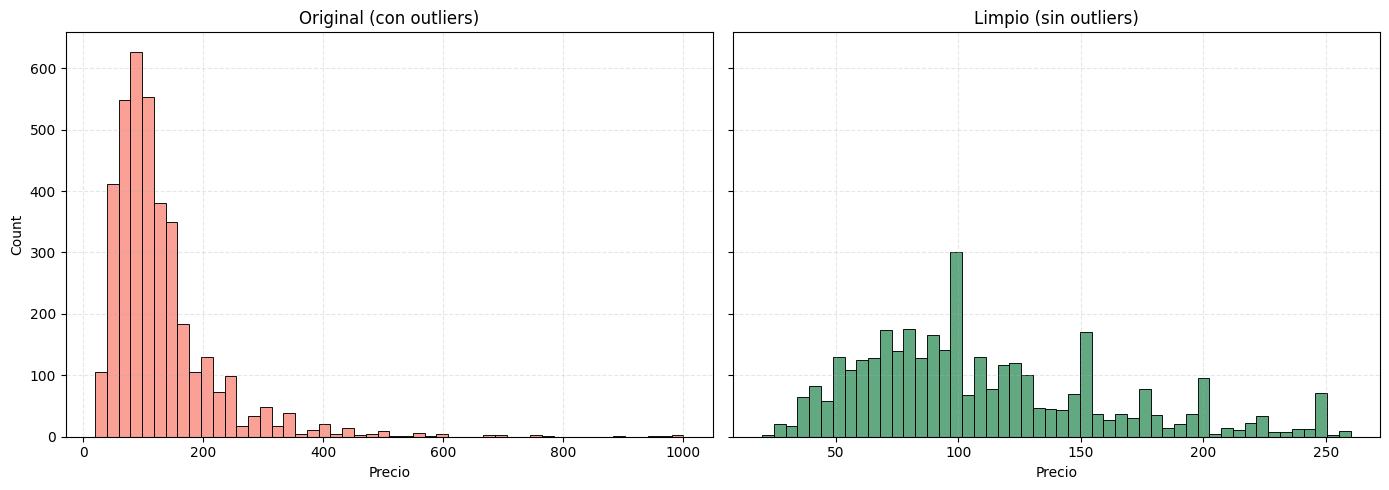

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(listings['price'], bins=50, color='salmon', ax=axes[0])
axes[0].set_title('Original (con outliers)')
axes[0].set_xlabel('Precio')
axes[0].grid(True, linestyle='--', alpha=0.3)

sns.histplot(listings_clean['price'], bins=50, color='seagreen', ax=axes[1])
axes[1].set_title('Limpio (sin outliers)')
axes[1].set_xlabel('Precio')
axes[1].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


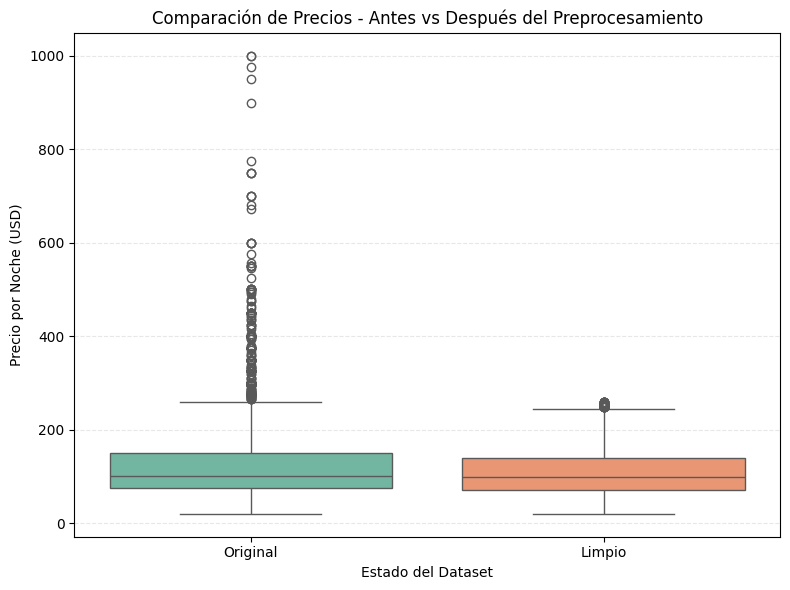

In [ ]:
# Crear un DataFrame combinado para comparar
df_box = pd.DataFrame({
    'Precio': pd.concat([listings['price'], listings_clean['price']], ignore_index=True),
    'Estado': ['Original'] * len(listings) + ['Limpio'] * len(listings_clean)
})

# Gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_box, x='Estado', y='Precio', palette='Set2')

plt.title('Comparación de Precios - Antes vs Después del Preprocesamiento')
plt.xlabel('Estado del Dataset')
plt.ylabel('Precio por Noche (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## <span style="color:#2F749F;"><strong>CRISP-DM – Fase 4: Modelado </strong></span>

La fase de **modelado** consiste en seleccionar y aplicar técnicas de **aprendizaje automático** o **métodos estadísticos** sobre los datos.  
Los modelos pueden clasificarse en:  

- <span style="color:#2E86AB; font-size:16px;">**Predictivos**</span>: regresión, clasificación.  
- <span style="color:#6A5ACD; font-size:16px;">**Descriptivos**</span>: agrupación o clustering.  
- <span style="color:#A0522D; font-size:16px;">**Inferenciales**</span>: comprobación de hipótesis.  

El rendimiento de los modelos se evalúa mediante **validación cruzada**, **ajuste de hiperparámetros** y métricas como **AUC**, **precisión** o **RMSE** [(James et al., 2021)](https://www.casact.org/sites/default/files/2022-12/James-G.-et-al.-2nd-edition-Springer-2021.pdf).  

<p align="center">
    <img src="Local\imgs\U2\F4.jpg" alt="F4" width="1000"  height="500">
</p>

Imagen tomada de [medium.com](https://medium.com/analytics-vidhya/crisp-dm-phase-3-data-preparation-faf5ee8dc38e)

El proceso de modelado suele ser **iterativo**:  

- Se prueban y comparan distintos algoritmos.  
- Se busca equilibrar **desempeño predictivo** e **interpretabilidad**.  

En áreas como **finanzas** o **salud**, puede preferirse un modelo interpretable (p. ej., **regresión logística**) frente a otro más complejo tipo *caja negra*.  

Herramientas como **SHAP** o **LIME** resultan útiles para explicar las predicciones y aumentar la confianza en el modelo. Los resultados del modelado suelen retroalimentar la fase de **preparación de los datos**. Esto implica, en muchos casos:  

- Generar nuevas variables.  
- Reprocesar atributos existentes.  
- Optimizar el conjunto de datos original.  

De esta manera, se garantiza que los modelos no solo sean técnicamente correctos, sino que aporten un <span style="color:#4CAF50;">**conocimiento accionable**</span> para la toma de decisiones.  

<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
<b>AIRBNB</b><br>  
<br> Objetivo: Predecir el precio del alojamiento según características del anuncio (listings), como tipo de habitación, número de huéspedes, puntuación de reseñas, etc.

📉 MAE (Error absoluto medio): $28.90
📉 RMSE (Raíz del error cuadrático medio): $37.69
📈 R² (Coef. de determinación): 0.468

 Influencia de cada variable en el precio:

                 Variable  Coeficiente
0            accommodates        12.70
1    review_scores_rating         0.47
2        availability_365         0.03
3       number_of_reviews        -0.06
4         reseñas_totales        -0.06
5  room_type_Private room       -37.80
6   room_type_Shared room       -63.10


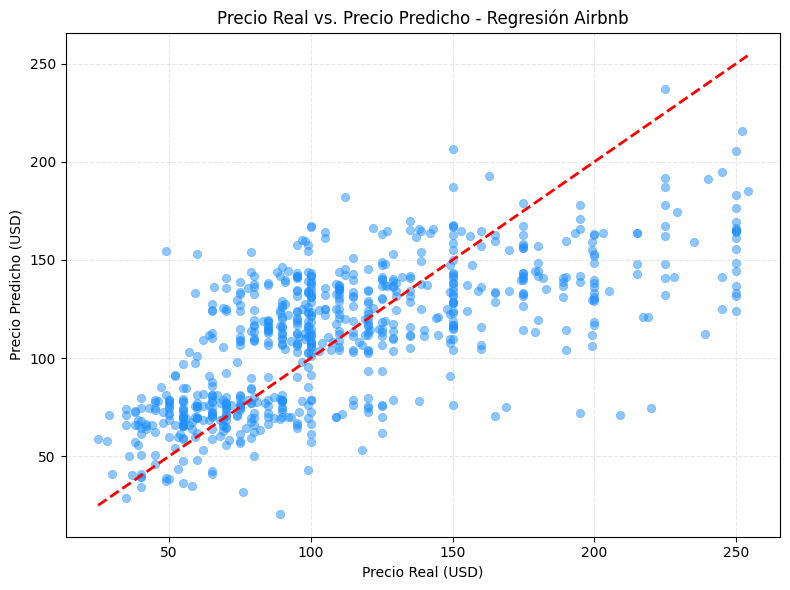

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Selección de variables predictoras y variable objetivo
features = [
    'room_type', 'accommodates', 'review_scores_rating',
    'availability_365', 'number_of_reviews', 'reseñas_totales'
]
target = 'price'

X = listings_clean[features].copy()
y = listings_clean[target]

# 2. Preprocesamiento

# Convertir variables categóricas en variables dummy (one-hot)
X = pd.get_dummies(X, columns=['room_type'], drop_first=True)

# Imputar valores faltantes con la media
X['review_scores_rating'] = X['review_scores_rating'].fillna(X['review_scores_rating'].mean())

# 3. Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Entrenar modelo de regresión
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 5. Evaluar desempeño del modelo
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📉 MAE (Error absoluto medio): ${mae:.2f}")
print(f"📉 RMSE (Raíz del error cuadrático medio): ${rmse:.2f}")
print(f"📈 R² (Coef. de determinación): {r2:.3f}")

# 6. Interpretar coeficientes
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_.round(2)
}).sort_values(by='Coeficiente', ascending=False)

print("\n Influencia de cada variable en el precio:\n")
print(coeficientes)

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='dodgerblue', edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

# Estética
plt.title('Precio Real vs. Precio Predicho - Regresión Airbnb')
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Evaluación XGBoost:
 - MAE: $28.07
 - RMSE: $37.69
 - R²: 0.475


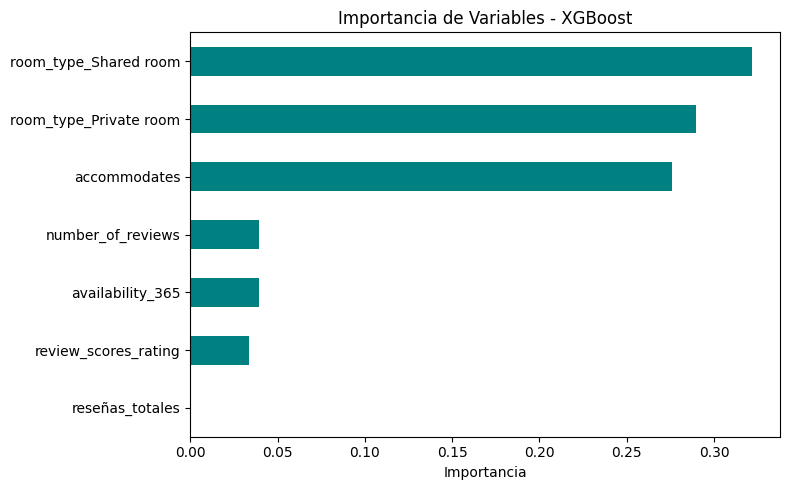

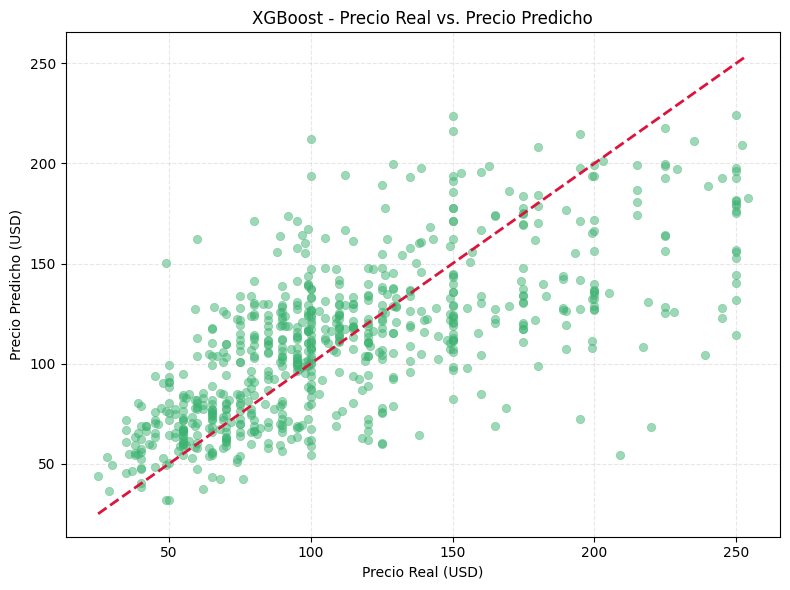

Influencia de las variables según XGBoost:

                 Variable  Importancia
6   room_type_Shared room     0.321739
5  room_type_Private room     0.289952
0            accommodates     0.275699
3       number_of_reviews     0.039634
2        availability_365     0.039454
1    review_scores_rating     0.033522
4         reseñas_totales     0.000000


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Preprocesamiento mínimo
X = listings_clean[[
    'room_type', 'accommodates', 'review_scores_rating',
    'availability_365', 'number_of_reviews', 'reseñas_totales'
]].copy()
y = listings_clean['price']

# Variables categóricas → dummies
X = pd.get_dummies(X, columns=['room_type'], drop_first=True)

# Imputar valores faltantes (si aplica)
X['review_scores_rating'] = X['review_scores_rating'].fillna(X['review_scores_rating'].mean())

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo XGBoost
modelo_xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42
)
modelo_xgb.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = modelo_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluación XGBoost:")
print(f" - MAE: ${mae:.2f}")
print(f" - RMSE: ${rmse:.2f}")
print(f" - R²: {r2:.3f}")

# Importancia de características
importancias = pd.Series(modelo_xgb.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(8, 5))
importancias.plot(kind='barh', color='teal')
plt.title('Importancia de Variables - XGBoost')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Gráfico de dispersión real vs predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='mediumseagreen', edgecolor=None)

# Línea ideal (y = x) para referencia
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='crimson', linestyle='--', linewidth=2)

# Estética
plt.title('XGBoost - Precio Real vs. Precio Predicho')
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Crear DataFrame con importancias
importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo_xgb.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Mostrar tabla ordenada
print("Influencia de las variables según XGBoost:\n")
print(importancia_df)

## <span style="color:#2F749F;"><strong>CRISP-DM – Fase 5: Evaluación </strong></span>

Tras el proceso de **modelado**, los resultados deben ser evaluados para asegurar que cumplen con:  

- Los **objetivos empresariales** planteados.  
- Los **criterios técnicos** definidos.  

La evaluación no se limita a métricas de rendimiento, sino que también considera:  

- **Sesgo e imparcialidad**.  
- **Estabilidad del modelo**.  
- **Validez de supuestos**.  
- **Capacidad de generalización** a datos nuevos [(Molnar, 2022)](https://christophm.github.io/interpretable-ml-book/).  

<p align="center">
    <img src="Local\imgs\U2\F5.jpg" alt="F5" width="1000"  height="500">
</p>

Imagen tomada de [medium.com](https://medium.com/analytics-vidhya/crisp-dm-phase-3-data-preparation-faf5ee8dc38e)

En esta fase es fundamental la participación de los **stakeholders**, con el fin de:  

- Verificar que las conclusiones del modelo son comprensibles.  
- Confirmar su potencial para integrarse en la **toma de decisiones**.  
- Realizar **pruebas de escenarios** o **simulaciones** que garanticen su aplicabilidad.  

#### **Consideraciones Éticas y Prácticas**  

La **equidad entre grupos demográficos** se ha vuelto esencial en la evaluación, especialmente en áreas sensibles como:  

- **Contratación**.  
- **Préstamos**.  
- **Cumplimiento legal**.  


Por lo tanto, una **fase de evaluación bien realizada** permite definir si conviene:  

- **Implantar** el modelo.  
- **Iterar** con nuevas mejoras.  
- **Descartar** el enfoque adoptado.  

<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
<b>AIRBNB</b><br>  

Evaluación del Modelo:
 - MAE  (Error Absoluto Medio):      $28.07
 - RMSE (Raíz del Error Cuadrático): $37.47
 - R²   (Coeficiente de Determinación): 0.475


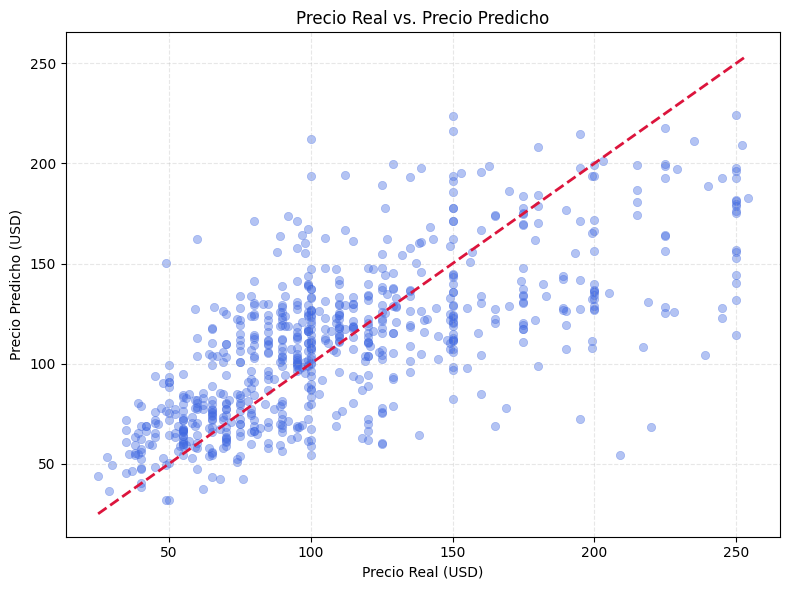

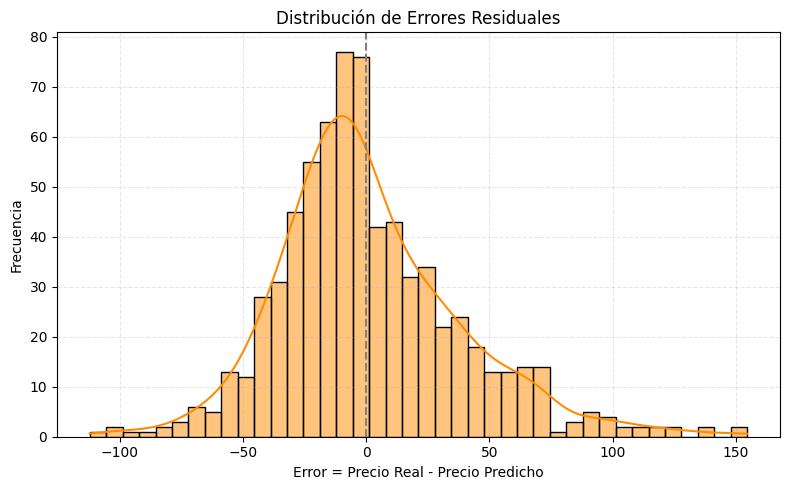


 Influencia de cada variable en el precio:

                 Variable  Coeficiente
0            accommodates        12.70
1    review_scores_rating         0.47
2        availability_365         0.03
3       number_of_reviews        -0.06
4         reseñas_totales        -0.06
5  room_type_Private room       -37.80
6   room_type_Shared room       -63.10


In [ ]:
# 1. Cálculo de métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print(f" - MAE  (Error Absoluto Medio):      ${mae:.2f}")
print(f" - RMSE (Raíz del Error Cuadrático): ${rmse:.2f}")
print(f" - R²   (Coeficiente de Determinación): {r2:.3f}")

# 2. Visualización: Real vs Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='royalblue', edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='crimson', linestyle='--', linewidth=2)
plt.title('Precio Real vs. Precio Predicho')
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Análisis de errores residuales
residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=40, kde=True, color='darkorange')
plt.title('Distribución de Errores Residuales')
plt.xlabel('Error = Precio Real - Precio Predicho')
plt.ylabel('Frecuencia')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Tabla de coeficientes (impacto de variables)
coeficientes = pd.DataFrame({
    'Variable': X_test.columns,
    'Coeficiente': modelo.coef_.round(2)
}).sort_values(by='Coeficiente', ascending=False)

print("\n Influencia de cada variable en el precio:\n")
print(coeficientes)

## <span style="color:#2F749F;"><strong>CRISP-DM – Fase 6: Despliegue </strong></span>
Garantizar que los resultados del análisis o modelo sean útiles y accesibles para quien los necesite (cliente, stakeholders, usuarios).

<p align="center">
    <img src="Local\imgs\U2\F6.jpg" alt="F6" width="1000"  height="500">
</p>


---

<div style="text-align:center; color:#607D8B; font-weight:bold; font-size:14px;">
“Sin datos, solo eres otra persona con una opinión.” – W. Edwards Deming
</div>